# Atividade: Perceptron para classificação de petróleo

**INSTITUTO FEDERAL DE MINAS GERAIS**  
*Departamento de Engenharia e Computação*  

**Professor:** Ciniro Nametala   
**Aluno:** Víctor Hordones Ramos


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygwalker as pyg
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import plotly.graph_objects as go

In [128]:
#funcao de ativacao
def degrauBipolar(u):
    return 1 if u >= 0 else -1

#classificacao da amostra
def previsao(w, x):
   u = np.dot(w.T, x)
   yhat = degrauBipolar(u)
   return yhat

In [129]:
dados = pd.read_csv('tabela_treino.csv', sep=';')
n_variaveis = dados.shape[1]-2
n_amostras = dados.shape[0]

x = dados.iloc[:, 1:n_variaveis+1].values

dados['x1'] = pd.to_numeric(dados['x1'], errors='coerce')
dados['x2'] = pd.to_numeric(dados['x2'], errors='coerce')
dados['x3'] = pd.to_numeric(dados['x3'], errors='coerce')
dados['y'] = pd.to_numeric(dados['d'], errors='coerce')


In [130]:
fig = go.Figure(data=[go.Scatter3d(

    x=dados['x1'], y=dados['x2'], z=dados['x3'],
    mode='markers',
    marker=dict(
        size=6,
        color=dados['y'],     
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(scene=dict(
    xaxis_title='x1',
    yaxis_title='x2',
    zaxis_title='x3'),
    title="Gráfico 3D das amostras"
)

fig.show()
#olhando o gráfico, fica evidente que a amostra não é linearmente separável. Ou seja, não conseguimos traçar
#uma linha/plano para separar as amostras do dataset.

In [131]:
bias = np.ones((n_amostras,1)) * -1
x = np.hstack((x,bias))

In [132]:
y = dados.iloc[:, 5].values

print(f"-1: {(y == -1).sum()}")
print(f"1: {(y == 1).sum()}")

-1: 16
1: 14


In [133]:
n_perceptron = 5
pesosAntes = []
pesos_ajustados = []
for i in range(n_perceptron):
   
   w = np.random.uniform(-1, 1, n_variaveis+1)
   pesosAntes.append(w.copy())

   #Passo 4
   #taxa de aprendizagem eta
   eta = 0.01

   #Passo 5
   #n_amostras

   #Passo 6
   tol = 0.01

   #Passo 7
   erro_medio = tol + 1

   #Passo 8
   erro_epocas = []

   #Passo 9
   epoca = 0

   #Passo 10
   max_epocas = 1000

   #Passo 11
   criterio_erro = True
   criterio_epoca = True

   #Passo 12 13 14 15 16 17 18 19 20 21 22 23 24
   while(criterio_epoca and criterio_erro):
      erro_atual = 0
      epoca = epoca + 1
      
      indices_embaralhados = np.random.permutation(n_amostras)
      
      for i in range(n_amostras):

         indice_amostra = indices_embaralhados[i]
         xi_amostra = x[indice_amostra, :]
         u = np.dot(w.T, xi_amostra)
         yhat = degrauBipolar(u)
         e = y[indice_amostra] - yhat
         w = w + ((eta * e) * xi_amostra)
         erro_atual = erro_atual + np.abs(e)
         
      erro_medio = erro_atual/n_amostras
      erro_epocas.append(erro_medio)
      
      if erro_medio <= tol:
         criterio_erro = False
      if epoca >= max_epocas:
         criterio_epoca = False
   pesos_ajustados.append(w.copy())

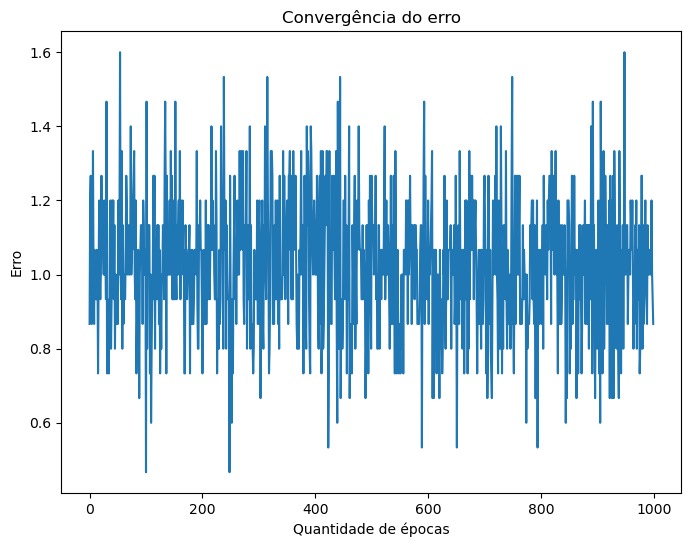

In [134]:
#plota grafico convergencia do erro
plt.figure(figsize=(8,6))
plt.plot(erro_epocas[:max_epocas])
plt.title("Convergência do erro")
plt.xlabel("Quantidade de épocas")
plt.ylabel("Erro")
plt.grid
plt.show()



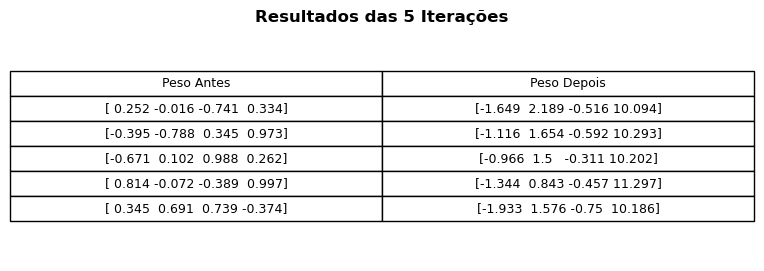

In [135]:
col_labels = ["Peso Antes", "Peso Depois"]
table_data = [
    [np.round(pesosAntes[i], 3), np.round(pesos_ajustados[i], 3)]
    for i in range(n_perceptron)
]

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis("off")
table = ax.table(
    cellText=table_data,
    colLabels=col_labels,
    loc="center",
    cellLoc="center",
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

plt.title("Resultados das 5 Iterações", fontsize=12, weight="bold")
plt.show()

In [136]:
yhat = np.zeros(n_amostras)
listayHat = []

for j in range(n_perceptron):

   for i in range(n_amostras):
      yhat[i] = previsao(pesos_ajustados[j], x[i,:])
      
   listayHat.append(yhat)
   yhat = np.zeros(n_amostras)
   
listayHat = np.array(listayHat)


Matriz de confusão T:  0


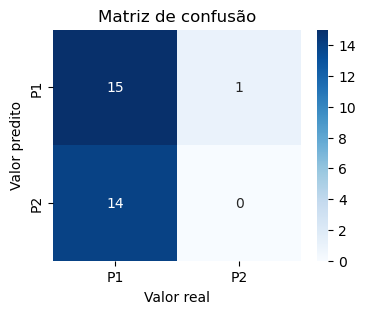

Matriz de confusão T:  1


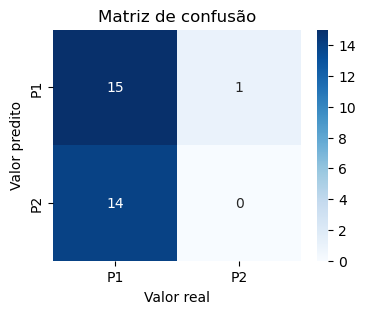

Matriz de confusão T:  2


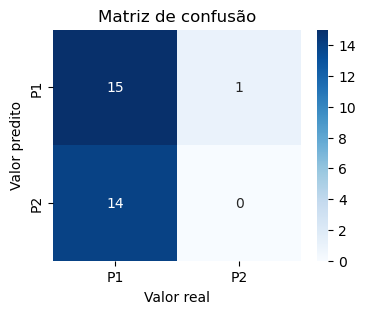

Matriz de confusão T:  3


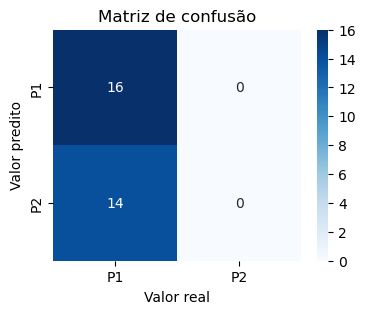

Matriz de confusão T:  4


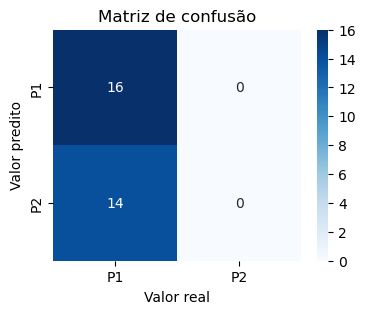

In [137]:
yhat_display = np.where(listayHat == -1,0,listayHat)
y_display = np.where(y == -1,0,y)

for i in range(n_perceptron):
   
   cm = confusion_matrix(y_display, yhat_display[i])
   print('Matriz de confusão T: ', i)
   
   plt.figure(figsize=(4,3))
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['P1', 'P2'], yticklabels=['P1', 'P2'])

   plt.title('Matriz de confusão')
   plt.xlabel('Valor real')
   plt.ylabel('Valor predito')
   plt.show()

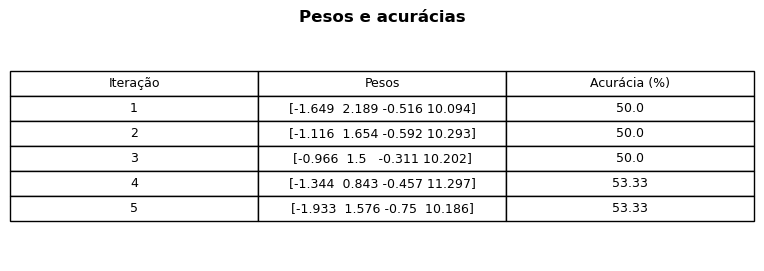

In [138]:
acuracias = []

for i in range(n_perceptron):
    acuracia = np.sum(listayHat[i] == y) / n_amostras
    acuracias.append(acuracia * 100)

# --- Criação da tabela com Matplotlib ---
col_labels = ["Iteração", "Pesos", "Acurácia (%)"]
table_data = [
    [i+1, np.round(pesos_ajustados[i], 3), round(acuracias[i], 2)] for i in range(n_perceptron)
]

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis("off")

table = ax.table(
    cellText=table_data,
    colLabels=col_labels,
    loc="center",
    cellLoc="center"
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

plt.title("Pesos e acurácias", fontsize=12, weight="bold")
plt.show()

In [139]:
dados = pd.read_csv('tabela_classificacao.csv', sep=';')
n_variaveis = dados.shape[1]

n_amostras = dados.shape[0]
x = dados.iloc[:, 0:n_variaveis].values

bias = np.ones((n_amostras,1)) * -1
x = np.hstack((x,bias))
print(x)


[[-0.3665  0.062   5.9891 -1.    ]
 [-0.7842  1.1267  5.5912 -1.    ]
 [ 0.3012  0.5611  5.8234 -1.    ]
 [ 0.7757  1.0648  8.0677 -1.    ]
 [ 0.157   0.8028  6.304  -1.    ]
 [-0.7014  1.0316  3.6005 -1.    ]
 [ 0.3748  0.1536  6.1537 -1.    ]
 [-0.692   0.9404  4.4058 -1.    ]
 [-1.397   0.7141  4.9263 -1.    ]
 [-1.8842  0.2805  1.2548 -1.    ]]


In [140]:
listayHat = []
yhat = np.zeros(n_amostras)

for j in range(n_perceptron):
   for i in range(n_amostras):

      yhat[i] = previsao(pesos_ajustados[j], x[i,:])

   listayHat.append(yhat)
   yhat = np.zeros(n_amostras)
   
listayHat = np.array(listayHat)
print(listayHat)

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]


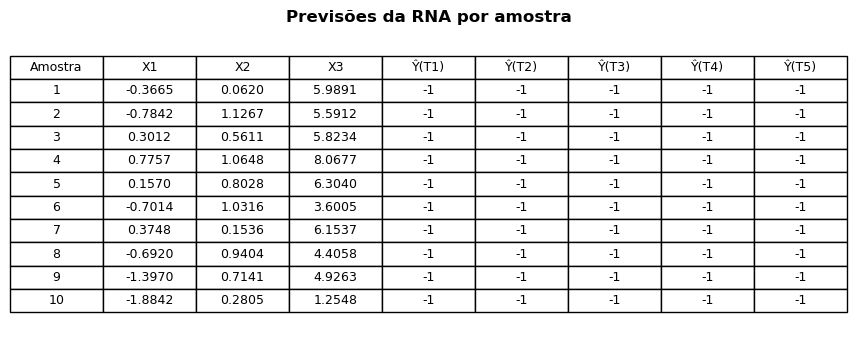

In [141]:
Xdados = x[:, :n_variaveis]

# Cria rótulos das colunas
col_labels = ["Amostra", "X1", "X2", "X3"] + [f"Ŷ(T{i+1})" for i in range(listayHat.shape[0])]

# Monta os dados da tabela
table_data = []
for i in range(x.shape[0]):

    linha = [
        i + 1,
        f"{Xdados[i,0]:.4f}",
        f"{Xdados[i,1]:.4f}",
        f"{Xdados[i,2]:.4f}",
    ]
    
    linha += [int(listayHat[j, i]) for j in range(listayHat.shape[0])]
    table_data.append(linha)

# Cria a tabela com Matplotlib
fig, ax = plt.subplots(figsize=(9, 4))
ax.axis('off')

table = ax.table(
    cellText=table_data,
    colLabels=col_labels,
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.4)

plt.title("Previsões da RNA por amostra", fontsize=12, weight='bold')
plt.show()


# **Perguntas**

#### **5) Qual o efeito de aumentar ou diminuir o número de épocas na qualidade dos resultados?**
Aumentar ou diminuir o número de épocas influencia diretamente na convergência do erro para 0, mas neste problema não adiantava. Porque o problema apresentado não pode ser separado linearmente, como uma perceptron faz. Então, o erro nunca convergia para 0, independente de aumentar ou diminuir o número de épocas para a previsão da amostra.

#### **6) Qual o efeito de aumentar ou diminuir a taxa de aprendizagem na qualidade dos resultados?**
Foi testado com uma taxa de aprendizdo entre 0.01 e 1 (até com o número mágico 0.03 foi testado). Sentiu-se que a diferença da acurácia e as iterações aumentavam conforme a taxa de aprendizado aumentava. Porém, independente da taxa de aprendizagem, a média entre as acurácias sempre estavam em torno de 60%. Percebeu-se que a taxa de aprendizado impactou muito pouco na convergência do erro.

#### **7) Discorra se é possível afirmar se as suas classes, neste problema, são linearmente separáveis.**
Não, as classes não são linearmente separáveis. Pode-se tirar essa conclusão através do gráfico 3d apresentado no início do documento, onde não se passa nenhuma linha ou plano pelas amostras deixando elas separadas linearmente.